In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numbers

In [4]:
df = pd.read_csv('excel_file\\features.csv')

In [5]:
df.head()

,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,61,Airplane,0.816530,0.243172,0.104760,1.000445,29.323366,"[127.64144538901368, 53.92937943956688, 109.23...","[0.4102485284500395, 0.409995849669504, 0.2334...","[0.6685345883750857, 0.6174403016505242, 0.944...","[0.006424413161939838, 0.060282562535023, 0.06...","[0.0005399558195533869, 1.2660697302259593e-05..."
1,62,Airplane,1.055936,0.220093,0.154714,1.000258,28.103265,"[104.87783507522738, 110.12837479945011, 3.763...","[0.18976349674772658, 0.41239811406733007, 0.1...","[0.08393702802254954, 0.08312483914143054, 0.9...","[0.04815934375930035, 0.040103630313646256, 0....","[0.000182921771505262, 0.0013378354788880298, ..."
2,63,Airplane,1.076293,0.201800,0.155263,1.000010,38.195171,"[129.13606674264514, 133.52686374019092, 42.73...","[0.21828897125936259, 0.3200114807858318, 0.39...","[0.1837080856263429, 0.07931737158725835, 0.35...","[0.03895517492964009, 0.06982188859863867, 0.0...","[0.0033729249867525584, 1.1658417701348637e-05..."
3,64,Airplane,1.155665,0.263145,0.181800,1.004268,35.951588,"[84.03473329976775, 34.391795711333664, 16.693...","[0.23741603958196783, 0.21137622156856722, 0.2...","[0.4092538186835591, 0.6419586559367241, 0.275...","[0.003655572659450838, 0.03031024844308955, 0....","[0.003088722409279323, 0.008096606474652348, 0..."
4,65,Airplane,1.277252,0.192208,0.191960,1.000053,40.720075,"[31.377660774213073, 72.019324821057, 7.566054...","[0.4106027381992136, 0.2037260595238763, 0.217...","[0.4467483525292441, 0.5695114872438042, 0.244...","[0.018890054564987477, 0.06539151072830708, 0....","[0.0007963377883753947, 3.982423645843826e-05,..."


In [6]:
print(type(df['A3'][0][0]))
len(df['A3'][0])

<class 'str'>


968154

In [26]:
def convert_to_float(value):
    col = value.str.strip('[]')
    col = col.str.split(',')
    for i in range(0, len(col)):
        col[i] = [float(j) for j in col[i]]

    return col


In [11]:
print(type(df['A3'][0][0]))
df[['A3', 'D1', 'D2', 'D3', 'D4']] = df[['A3', 'D1', 'D2', 'D3', 'D4']] .apply(convert_to_float)
df.head()

<class 'str'>


,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,61,Airplane,0.816530,0.243172,0.104760,1.000445,29.323366,"[127.64144538901368, 53.92937943956688, 109.23...","[0.4102485284500395, 0.409995849669504, 0.2334...","[0.6685345883750857, 0.6174403016505242, 0.944...","[0.006424413161939838, 0.060282562535023, 0.06...","[0.0005399558195533869, 1.2660697302259593e-05..."
1,62,Airplane,1.055936,0.220093,0.154714,1.000258,28.103265,"[104.87783507522738, 110.12837479945011, 3.763...","[0.18976349674772658, 0.41239811406733007, 0.1...","[0.08393702802254954, 0.08312483914143054, 0.9...","[0.04815934375930035, 0.040103630313646256, 0....","[0.000182921771505262, 0.0013378354788880298, ..."
2,63,Airplane,1.076293,0.201800,0.155263,1.000010,38.195171,"[129.13606674264514, 133.52686374019092, 42.73...","[0.21828897125936259, 0.3200114807858318, 0.39...","[0.1837080856263429, 0.07931737158725835, 0.35...","[0.03895517492964009, 0.06982188859863867, 0.0...","[0.0033729249867525584, 1.1658417701348637e-05..."
3,64,Airplane,1.155665,0.263145,0.181800,1.004268,35.951588,"[84.03473329976775, 34.391795711333664, 16.693...","[0.23741603958196783, 0.21137622156856722, 0.2...","[0.4092538186835591, 0.6419586559367241, 0.275...","[0.003655572659450838, 0.03031024844308955, 0....","[0.003088722409279323, 0.008096606474652348, 0..."
4,65,Airplane,1.277252,0.192208,0.191960,1.000053,40.720075,"[31.377660774213073, 72.019324821057, 7.566054...","[0.4106027381992136, 0.2037260595238763, 0.217...","[0.4467483525292441, 0.5695114872438042, 0.244...","[0.018890054564987477, 0.06539151072830708, 0....","[0.0007963377883753947, 3.982423645843826e-05,..."


In [13]:
def plot_distribution(df, col, xmin, xmax, limit):
    fig, ax = plt.subplots(5, 4)
    plt.subplots_adjust(wspace=0.5, hspace=1)
    a = 0
    b = 0
    for i in range(0, 19):
        print(i)
        for j in range(i * 20, i * 20 + 20):
            sns.kdeplot(df.loc[j, col], ax=ax[a, b]).set(title=df.loc[j, 'class'], xlim=(xmin, xmax), ylim=(0, limit))
        if b == 3:
            b = 0
            a += 1
        else:
            b += 1
    plt.show()


def convert_to_float(value):
    col = value.str.strip('[]')
    col = col.str.split(',')
    for i in range(0, len(col)):
        col[i] = [float(j) for j in col[i]]

    return col


###Normalize the columns so mean = 0 and std = 1
def standardize(col):
    col = col.apply(lambda x: np.array(x))
    return (col - col.map(lambda x: x.mean()))/col.map(lambda x: x.std())


def to_bin(df, plot=False):

    df['A3'] = standardize(df['A3'])
    df['D1'] = standardize(df['D1'])
    df['D2'] = standardize(df['D2'])
    df['D3'] = standardize(df['D3'])
    df['D4'] = standardize(df['D4'])

    ###Get minimum and maximum value of the distributions, used for histogram
    a3min = min(df['A3'].map(lambda x: x.min()))
    d1min = min(df['D1'].map(lambda x: x.min()))
    d2min = min(df['D2'].map(lambda x: x.min()))
    d3min = min(df['D3'].map(lambda x: x.min()))
    d4min = min(df['D4'].map(lambda x: x.min()))
    a3max = max(df['A3'].map(lambda x: x.max()))
    d1max = max(df['D1'].map(lambda x: x.max()))
    d2max = max(df['D2'].map(lambda x: x.max()))
    d3max = max(df['D3'].map(lambda x: x.max()))
    d4max = max(df['D4'].map(lambda x: x.max()))

    if plot:
        print('A3')
        plot_distribution(df, 'A3', a3min, a3max, 1.5)
        print('D1')
        plot_distribution(df, 'D1', d1min, d1max, 1)
        print('D2')
        plot_distribution(df, 'D2', d2min, d2max, 1)
        print('D3')
        plot_distribution(df, 'D3', d3min, d3max, 1)
        print('D4')
        plot_distribution(df, 'D4', d4min, d4max, 2)
        print('end')
    df['A3'] = df['A3'].map(lambda x: np.histogram(x, bins=20, range=(a3min, a3max)))
    df['D1'] = df['D1'].map(lambda x: np.histogram(x, bins=20, range=(d1min, d1max)))
    df['D2'] = df['D2'].map(lambda x: np.histogram(x, bins=20, range=(d2min, d2max)))
    df['D3'] = df['D3'].map(lambda x: np.histogram(x, bins=20, range=(d3min, d3max)))
    df['D4'] = df['D4'].map(lambda x: np.histogram(x, bins=20, range=(d4min, d4max)))

    df['A3'] = [i[0] for i in df['A3']]
    df['D1'] = [i[0] for i in df['D1']]
    df['D2'] = [i[0] for i in df['D2']]
    df['D3'] = [i[0] for i in df['D3']]
    df['D4'] = [i[0] for i in df['D4']]

    return df

A3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


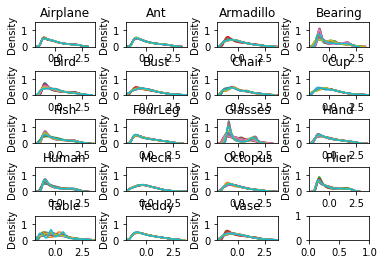

D1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


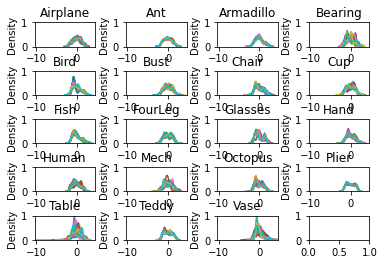

D2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


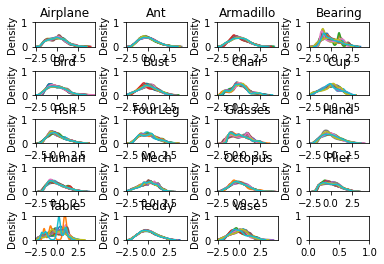

D3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


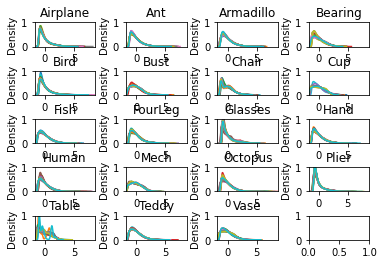

D4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


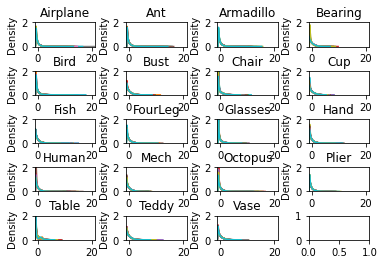

end


In [14]:
df = to_bin(df, True)

In [15]:
df.to_csv('excel_file\\standardized.csv')

In [15]:
###Normalize the columns so mean = 0 and std = 1
def standardize(col):
    col = col.apply(lambda x: np.array(x))
    return (col - col.map(lambda x: x.mean()))/col.map(lambda x: x.std())

df['A3'] = standardize(df['A3'])
df['D1'] = standardize(df['D1'])
df['D2'] = standardize(df['D2'])
df['D3'] = standardize(df['D3'])
df['D4'] = standardize(df['D4'])
df.head()

,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,61,Airplane,0.494149,0.243171,0.104760,1.000444,29.323367,"[-0.5296745080738563, -1.187291540458412, -1.0...","[0.3350267531110621, 0.04394871530380584, -0.0...","[-0.8972257953051038, -0.47307971452523623, 2....","[-0.9338325421698556, 0.6540866315349327, -1.0...","[-0.24930145896993994, -0.5441794910737817, -0..."
1,62,Airplane,0.542197,0.220093,0.154731,1.000257,28.074691,"[0.6628993096868683, -1.0849964661617981, 0.72...","[2.2029771913231495, 2.206978473151657, 2.0994...","[-1.5370795462840594, -0.4992875500719065, 1.4...","[-0.9192358027592415, -0.8255090852317737, -0....","[-0.43717502403890146, -0.23886625054875954, -..."
2,63,Airplane,0.542378,0.201800,0.155292,1.000011,38.171411,"[1.115809668665863, 0.30870131006464036, -0.00...","[1.4855393100447873, 1.445903929674618, 1.4826...","[-1.2314045058196876, 0.25602099109978904, 0.2...","[0.30889064480022826, -0.8793850184396452, -0....","[-0.12030856034328652, -0.5521644181626562, -0..."
3,64,Airplane,0.661712,0.263144,0.181800,1.004269,35.951593,"[-0.8386029836366907, 1.915751685967294, 1.320...","[1.266807747323897, 1.376463407380352, 1.09672...","[-1.3442684586343407, -1.1667604198571324, 1.6...","[-0.9986762740899412, -0.6777050843241017, 1.1...","[-0.5815225198991847, 0.9226403021026134, -0.7..."
4,65,Airplane,0.624359,0.192208,0.191960,1.000052,40.720074,"[2.0111381106728126, 2.2124135927340163, 0.674...","[0.863653383033297, 0.7602754385665196, 0.3255...","[-0.6951832964095647, 0.6005566562344778, 0.69...","[-0.9257955513887689, -0.37969094233689743, 0....","[-0.6272526327657383, -0.3142871579669527, -0...."


In [16]:
a3min = min(df['A3'].map(lambda x: x.min()))
d1min = min(df['D1'].map(lambda x: x.min()))
d2min = min(df['D2'].map(lambda x: x.min()))
d3min = min(df['D3'].map(lambda x: x.min()))
d4min = min(df['D4'].map(lambda x: x.min()))
a3max = max(df['A3'].map(lambda x: x.max()))
d1max = max(df['D1'].map(lambda x: x.max()))
d2max = max(df['D2'].map(lambda x: x.max()))
d3max = max(df['D3'].map(lambda x: x.max()))
d4max = max(df['D4'].map(lambda x: x.max()))

In [63]:
# def plot_distribution(df, col):
#     fig, ax = plt.subplots(5, 4)
#     a = 0
#     b = 0
#     for i in range(0, 19):
#         print(i)
#         for j in range(i * 20, i * 20 + 20):
#             data = (np.array(df.loc[j, col]) - min(df.loc[j, col])) / max(df.loc[j, col])
#             sns.kdeplot(data, ax=ax[a, b]).set_title(df.loc[j, 'class'])
#         if b == 3:
#             b = 0
#             a += 1
#         else:
#             b += 1
#     plt.show()


# plot_distribution(df, 'A3')

In [17]:
df['A3'] = df['A3'].map(lambda x: np.histogram(x, bins = 20, range = (a3min, a3max)))
df['D1'] = df['D1'].map(lambda x: np.histogram(x, bins = 20, range = (d1min, d1max)))
df['D2'] = df['D2'].map(lambda x: np.histogram(x, bins = 20, range = (d2min, d2max)))
df['D3'] = df['D3'].map(lambda x: np.histogram(x, bins = 20, range = (d3min, d3max)))
df['D4'] = df['D4'].map(lambda x: np.histogram(x, bins = 20, range = (d4min, d4max)))
df

,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,61,Airplane,0.494149,0.243171,0.104760,1.000444,29.323367,"([0, 7, 6788, 7505, 6390, 5238, 4452, 3769, 32...","([0, 0, 0, 0, 30, 156, 220, 317, 330, 417, 108...","([0, 0, 948, 3639, 5414, 5848, 6107, 6106, 639...","([0, 68671, 77175, 42500, 23408, 14214, 9840, ...","([1418263, 404399, 106698, 39282, 17819, 8333,..."
1,62,Airplane,0.542197,0.220093,0.154731,1.000257,28.074691,"([0, 0, 6416, 8088, 6508, 5414, 4312, 3410, 29...","([0, 0, 0, 0, 24, 232, 193, 306, 340, 162, 193...","([0, 0, 877, 3821, 5648, 5640, 5950, 6282, 614...","([0, 65673, 79322, 45437, 23581, 13598, 8597, ...","([1413051, 406505, 110278, 40092, 16882, 8072,..."
2,63,Airplane,0.542378,0.201800,0.155292,1.000011,38.171411,"([0, 22, 7169, 6851, 5991, 5791, 4791, 3899, 3...","([0, 0, 0, 0, 150, 110, 189, 261, 201, 239, 35...","([0, 0, 2076, 4464, 4429, 4435, 4757, 6145, 65...","([0, 69814, 79253, 39009, 21260, 14885, 10744,...","([1405645, 400640, 117997, 46656, 19252, 6943,..."
3,64,Airplane,0.661712,0.263144,0.181800,1.004269,35.951593,"([0, 215, 6876, 6904, 6208, 5556, 4702, 3841, ...","([0, 0, 0, 1, 137, 125, 140, 253, 341, 264, 22...","([0, 0, 1642, 4088, 4814, 4864, 5385, 6352, 67...","([0, 73286, 70583, 40091, 24294, 16334, 12018,...","([1379396, 430460, 120613, 43320, 16208, 6055,..."
4,65,Airplane,0.624359,0.192208,0.191960,1.000052,40.720074,"([0, 0, 6925, 7142, 6297, 5594, 4717, 3830, 31...","([0, 0, 0, 14, 75, 172, 209, 235, 251, 238, 34...","([0, 0, 1615, 4123, 4766, 4864, 5639, 6475, 65...","([0, 68225, 79751, 40105, 22666, 15474, 10489,...","([1405926, 401446, 120219, 44629, 17155, 6784,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
375,376,Vase,1.541896,0.548860,0.310308,1.000382,5.390367,"([478, 2823, 4482, 5273, 5650, 5396, 4807, 442...","([0, 10, 12, 10, 95, 186, 102, 101, 343, 414, ...","([9, 866, 2096, 3297, 3943, 4663, 5348, 6017, ...","([23981, 49344, 50995, 44331, 35265, 24069, 13...","([1267452, 490078, 180299, 51626, 9495, 1007, ..."
376,377,Vase,1.205656,0.654934,0.247341,1.008413,8.469836,"([0, 2668, 4957, 5639, 5863, 5370, 4707, 4401,...","([0, 0, 0, 0, 0, 161, 341, 321, 204, 257, 279,...","([0, 264, 2094, 3210, 3682, 4992, 6433, 7128, ...","([18250, 56177, 51172, 45793, 36960, 21645, 10...","([1288386, 478765, 170037, 47698, 11780, 2981,..."
377,378,Vase,1.298496,0.609696,0.372161,1.007646,4.727474,"([296, 2820, 4366, 5249, 5736, 5643, 5142, 450...","([0, 0, 0, 0, 93, 173, 128, 254, 342, 265, 262...","([6, 1022, 2078, 2869, 3780, 4641, 5426, 6534,...","([21482, 51249, 51809, 46974, 34867, 22854, 12...","([1297832, 474136, 166558, 45415, 11536, 3137,..."
378,379,Vase,1.277709,0.796104,0.326280,1.003819,3.355870,"([765, 2755, 4054, 5111, 5515, 5586, 5158, 464...","([0, 0, 0, 0, 79, 43, 153, 402, 425, 462, 69, ...","([44, 1143, 1954, 2765, 3860, 4434, 5241, 6340...","([29100, 44128, 46852, 43435, 38381, 28803, 13...","([1258866, 491127, 192135, 49458, 7636, 733, 4..."


In [19]:
#get y value only
df['A3']= [i[0] for i in df['A3']]
df['D1']= [i[0] for i in df['D1']]
df['D2']= [i[0] for i in df['D2']]
df['D3']= [i[0] for i in df['D3']]
df['D4']= [i[0] for i in df['D4']]

In [20]:
df.head()

,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,61,Airplane,0.494149,0.243171,0.104760,1.000444,29.323367,"[0, 7, 6788, 7505, 6390, 5238, 4452, 3769, 326...","[0, 0, 0, 0, 30, 156, 220, 317, 330, 417, 108,...","[0, 0, 948, 3639, 5414, 5848, 6107, 6106, 6392...","[0, 68671, 77175, 42500, 23408, 14214, 9840, 6...","[1418263, 404399, 106698, 39282, 17819, 8333, ..."
1,62,Airplane,0.542197,0.220093,0.154731,1.000257,28.074691,"[0, 0, 6416, 8088, 6508, 5414, 4312, 3410, 296...","[0, 0, 0, 0, 24, 232, 193, 306, 340, 162, 193,...","[0, 0, 877, 3821, 5648, 5640, 5950, 6282, 6148...","[0, 65673, 79322, 45437, 23581, 13598, 8597, 5...","[1413051, 406505, 110278, 40092, 16882, 8072, ..."
2,63,Airplane,0.542378,0.201800,0.155292,1.000011,38.171411,"[0, 22, 7169, 6851, 5991, 5791, 4791, 3899, 30...","[0, 0, 0, 0, 150, 110, 189, 261, 201, 239, 356...","[0, 0, 2076, 4464, 4429, 4435, 4757, 6145, 651...","[0, 69814, 79253, 39009, 21260, 14885, 10744, ...","[1405645, 400640, 117997, 46656, 19252, 6943, ..."
3,64,Airplane,0.661712,0.263144,0.181800,1.004269,35.951593,"[0, 215, 6876, 6904, 6208, 5556, 4702, 3841, 3...","[0, 0, 0, 1, 137, 125, 140, 253, 341, 264, 222...","[0, 0, 1642, 4088, 4814, 4864, 5385, 6352, 672...","[0, 73286, 70583, 40091, 24294, 16334, 12018, ...","[1379396, 430460, 120613, 43320, 16208, 6055, ..."
4,65,Airplane,0.624359,0.192208,0.191960,1.000052,40.720074,"[0, 0, 6925, 7142, 6297, 5594, 4717, 3830, 310...","[0, 0, 0, 14, 75, 172, 209, 235, 251, 238, 349...","[0, 0, 1615, 4123, 4766, 4864, 5639, 6475, 653...","[0, 68225, 79751, 40105, 22666, 15474, 10489, ...","[1405926, 401446, 120219, 44629, 17155, 6784, ..."


In [95]:
df.to_csv('excel_file\\standardized.csv')


In [3]:
df = pd.read_csv('excel_file\\standardized.csv')

In [23]:
df = pd.read_csv('excel_file\\standardized.csv')
def adjust_string_to_float(value):
    col = value.str.strip('[]')
    col = col.str.split(' ')
    for i in range(0, len(col)):
        col[i] = map(str.strip, col[i])
        col[i] = [ x for x in col[i] if x.isdigit()]
        col[i] = [float(j) for j in col[i]]
    return col

df[['A3', 'D1', 'D2', 'D3', 'D4']] = df[['A3', 'D1', 'D2', 'D3', 'D4']] .apply(adjust_string_to_float)

In [142]:
df.head()

,Unnamed: 0,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,61,Airplane,0.496910,0.243216,0.106046,1.000218,28.884294,"[0.0, 37.0, 6795.0, 7497.0, 6255.0, 5326.0, 46...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 196.0, 27...","[0.0, 0.0, 837.0, 3582.0, 5166.0, 5739.0, 6010...","[0.0, 62684.0, 79713.0, 43971.0, 23878.0, 1456...","[1436312.0, 395868.0, 102509.0, 36566.0, 16485..."
1,1,62,Airplane,0.543622,0.221356,0.155964,1.000193,27.906876,"[0.0, 0.0, 6415.0, 8203.0, 6603.0, 5251.0, 432...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 262.0, 24...","[0.0, 0.0, 788.0, 3735.0, 5569.0, 5413.0, 5694...","[0.0, 60892.0, 80103.0, 46354.0, 24847.0, 1420...","[1433575.0, 395032.0, 105545.0, 37810.0, 16089..."
2,2,63,Airplane,0.544387,0.202814,0.156268,1.000343,39.538435,"[0.0, 19.0, 7384.0, 6753.0, 5902.0, 5751.0, 47...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 141.0, 135.0, 2...","[0.0, 0.0, 2122.0, 4305.0, 4353.0, 4202.0, 434...","[0.0, 64364.0, 81367.0, 39907.0, 21871.0, 1494...","[1421360.0, 393624.0, 114359.0, 44413.0, 17710..."
3,3,64,Airplane,0.665565,0.264393,0.183340,1.003740,36.679482,"[0.0, 79.0, 6940.0, 7186.0, 6119.0, 5620.0, 46...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 145.0, 139.0, 1...","[0.0, 0.0, 1688.0, 3963.0, 4519.0, 4645.0, 523...","[0.0, 67949.0, 72524.0, 41214.0, 24551.0, 1658...","[1397935.0, 421510.0, 116129.0, 40501.0, 14905..."
4,4,65,Airplane,0.627019,0.193280,0.195275,1.000026,41.538507,"[0.0, 0.0, 6857.0, 7262.0, 6300.0, 5761.0, 469...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 69.0, 217.0, 27...","[0.0, 0.0, 1581.0, 4025.0, 4631.0, 4698.0, 525...","[0.0, 62598.0, 81556.0, 41685.0, 22836.0, 1585...","[1424311.0, 393868.0, 114284.0, 41996.0, 15869..."


In [143]:
len(df['A3'][0])

20

In [46]:
df.columns

Index(['Unnamed: 0', 'mesh_id', 'class', 'surface_area', 'sphericity',
       'bounding_box_volume', 'diameter', 'eccentricity', 'A3', 'D1', 'D2',
       'D3', 'D4'],
      dtype='object')

In [47]:
###Normalize the columns so mean = 0 and std = 1
def standardize_single_value(col, df):
    return (df[col] - df[col].mean())/ df[col].std()


test_df['surface_area'] = standardize_single_value('surface_area', test_df)
test_df['sphericity'] = standardize_single_value('sphericity', test_df)
test_df['bounding_box_volume'] = standardize_single_value('bounding_box_volume', test_df)
test_df['diameter'] = standardize_single_value('diameter', test_df)
test_df['eccentricity'] = standardize_single_value('eccentricity', test_df)

In [48]:
###columns to percentage for the distributions
def to_percentage(col):
    col =  col.apply(lambda x: np.array(x))
    return ((col / col.map(lambda x: x.sum()))/20)

test_df['A3'] = to_percentage(test_df['A3'])
test_df['D1'] = to_percentage(test_df['D1'])
test_df['D2'] = to_percentage(test_df['D2'])
test_df['D3'] = to_percentage(test_df['D3'])
test_df['D4'] = to_percentage(test_df['D4'])
test_df.head()

,Unnamed: 0,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,61,Airplane,-0.749402,-1.202723,-0.910682,-0.779476,0.258495,"[0.0, 3.7e-05, 0.006795, 0.007496999999999999,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005744255744...","[0.0, 0.0, 0.0008370000000000001, 0.0035819999...","[0.0, 0.0125368, 0.0159426, 0.0087942, 0.00477...","[0.035907800000000004, 0.0098967, 0.002562725,..."
1,1,62,Airplane,-0.703180,-1.320547,-0.665265,-0.779880,0.228528,"[0.0, 0.0, 0.006415, 0.008203, 0.006603, 0.005...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004245754245...","[0.0, 0.0, 0.000788, 0.003735, 0.005569, 0.005...","[0.0, 0.0121784, 0.0160206, 0.0092708, 0.00496...","[0.035839375, 0.0098758, 0.002638625, 0.000945..."
2,2,63,Airplane,-0.702423,-1.420488,-0.663775,-0.777476,0.585153,"[0.0, 1.9e-05, 0.007384, 0.006753, 0.005902, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035214785214...","[0.0, 0.0, 0.0021219999999999998, 0.004305, 0....","[0.0, 0.0128728, 0.0162734, 0.0079814, 0.00437...","[0.035533999999999996, 0.0098406, 0.002858975,..."
3,3,64,Airplane,-0.582516,-1.088576,-0.530676,-0.723055,0.497497,"[0.0, 7.9e-05, 0.00694, 0.007186, 0.006119, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036213786213...","[0.0, 0.0, 0.0016879999999999998, 0.0039629999...","[0.0, 0.013589799999999999, 0.0145048000000000...","[0.034948375, 0.01053775, 0.002903224999999999..."
4,4,65,Airplane,-0.620658,-1.471874,-0.471998,-0.782549,0.646476,"[0.0, 0.0, 0.006857, 0.007262, 0.0063, 0.00576...","[0.0, 0.0, 0.0, 0.0, 0.0, 7.492507492507493e-0...","[0.0, 0.0, 0.0015810000000000002, 0.004025, 0....","[0.0, 0.0125196, 0.0163112, 0.008337, 0.004567...","[0.035607775, 0.0098467, 0.0028571, 0.00104989..."


In [49]:
def convert_scientific_notation(col):
    for i in range(0, len(col)):
        col[i] = [format(value, '.5f') for value in col[i]]
    return col
test_df[['A3', 'D1', 'D2', 'D3', 'D4']] = test_df[['A3', 'D1', 'D2', 'D3', 'D4']] .apply(convert_scientific_notation)
test_df

,Unnamed: 0,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,61,Airplane,-0.749402,-1.202723,-0.910682,-0.779476,0.258495,"[0.00000, 0.00004, 0.00679, 0.00750, 0.00625, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00000, 0.00084, 0.00358, 0.00517, ...","[0.00000, 0.01254, 0.01594, 0.00879, 0.00478, ...","[0.03591, 0.00990, 0.00256, 0.00091, 0.00041, ..."
1,1,62,Airplane,-0.703180,-1.320547,-0.665265,-0.779880,0.228528,"[0.00000, 0.00000, 0.00641, 0.00820, 0.00660, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00000, 0.00079, 0.00374, 0.00557, ...","[0.00000, 0.01218, 0.01602, 0.00927, 0.00497, ...","[0.03584, 0.00988, 0.00264, 0.00095, 0.00040, ..."
2,2,63,Airplane,-0.702423,-1.420488,-0.663775,-0.777476,0.585153,"[0.00000, 0.00002, 0.00738, 0.00675, 0.00590, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00000, 0.00212, 0.00430, 0.00435, ...","[0.00000, 0.01287, 0.01627, 0.00798, 0.00437, ...","[0.03553, 0.00984, 0.00286, 0.00111, 0.00044, ..."
3,3,64,Airplane,-0.582516,-1.088576,-0.530676,-0.723055,0.497497,"[0.00000, 0.00008, 0.00694, 0.00719, 0.00612, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00000, 0.00169, 0.00396, 0.00452, ...","[0.00000, 0.01359, 0.01450, 0.00824, 0.00491, ...","[0.03495, 0.01054, 0.00290, 0.00101, 0.00037, ..."
4,4,65,Airplane,-0.620658,-1.471874,-0.471998,-0.782549,0.646476,"[0.00000, 0.00000, 0.00686, 0.00726, 0.00630, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00000, 0.00158, 0.00402, 0.00463, ...","[0.00000, 0.01252, 0.01631, 0.00834, 0.00457, ...","[0.03561, 0.00985, 0.00286, 0.00105, 0.00040, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,376,Vase,0.296706,0.443886,0.098388,-0.773246,-0.466935,"[0.00043, 0.00276, 0.00450, 0.00549, 0.00570, ...","[0.00000, 0.00000, 0.00000, 0.00002, 0.00040, ...","[0.00004, 0.00087, 0.00215, 0.00311, 0.00377, ...","[0.00449, 0.00961, 0.01005, 0.00899, 0.00707, ...","[0.03208, 0.01220, 0.00434, 0.00117, 0.00019, ..."
376,376,377,Vase,-0.032481,1.016631,-0.212833,-0.644251,-0.380545,"[0.00000, 0.00259, 0.00495, 0.00579, 0.00590, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00000, 0.00034, 0.00197, 0.00310, 0.00358, ...","[0.00342, 0.01077, 0.01021, 0.00920, 0.00745, ...","[0.03256, 0.01193, 0.00411, 0.00108, 0.00026, ..."
377,377,378,Vase,0.046283,0.758463,0.390875,-0.642428,-0.488044,"[0.00025, 0.00293, 0.00432, 0.00521, 0.00578, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00005, 0.00106, 0.00190, 0.00271, 0.00379, ...","[0.00392, 0.01016, 0.01015, 0.00933, 0.00714, ...","[0.03283, 0.01181, 0.00397, 0.00104, 0.00025, ..."
378,378,379,Vase,0.020681,1.766074,0.159727,-0.726311,-0.523640,"[0.00073, 0.00276, 0.00415, 0.00518, 0.00547, ...","[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, ...","[0.00007, 0.00120, 0.00189, 0.00277, 0.00356, ...","[0.00550, 0.00869, 0.00914, 0.00867, 0.00768, ...","[0.03188, 0.01221, 0.00463, 0.00111, 0.00015, ..."


In [51]:
test_df.to_csv('excel_file\\matching_features.csv')

In [22]:
import string
df = pd.read_csv('excel_file\\matching_features.csv')
def feature_adjustment(value):
    col = value.str.strip('[]')
    col = col.str.split(' ')
    for i in range(0, len(col)):
        print(col[i])
        col[i] = map(str.strip, col[i])
        col[i] = col[i] = [re.sub('[^\d\.]', '', s) for s in col[i]]
        col[i] = [float(j) for j in col[i]]
    return col
df

,Unnamed: 0,Unnamed: 0.1,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,0,61,Airplane,-1.060302,-1.199292,-0.900054,-0.788678,0.278511,"['0.00000', '0.00070', '0.13216', '0.14810', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.00000', '0.03056', '0.08808', '...","['0.00000', '0.24220', '0.31176', '0.17787', '...","['0.68704', '0.21381', '0.05858', '0.02190', '..."
1,1,1,62,Airplane,-0.684779,-1.323414,-0.660335,-0.791777,0.239442,"['0.00000', '0.00000', '0.12622', '0.16326', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.00000', '0.03272', '0.09028', '...","['0.00000', '0.22929', '0.32020', '0.19095', '...","['0.68307', '0.21599', '0.06047', '0.02254', '..."
2,2,2,63,Airplane,-0.652849,-1.421798,-0.657700,-0.795898,0.562598,"['0.00000', '0.00044', '0.14298', '0.13602', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.00222', '0.05674', '0.09624', '...","['0.00000', '0.24422', '0.32413', '0.16660', '...","['0.68058', '0.21152', '0.06387', '0.02611', '..."
3,3,3,64,Airplane,-0.528349,-1.091874,-0.530354,-0.725224,0.490755,"['0.00000', '0.00220', '0.13850', '0.13854', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.00200', '0.04606', '0.09244', '...","['0.00000', '0.26285', '0.28528', '0.16711', '...","['0.66696', '0.22646', '0.06588', '0.02458', '..."
4,4,4,65,Airplane,-0.337634,-1.473387,-0.481600,-0.795184,0.643448,"['0.00000', '0.00000', '0.13524', '0.14442', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.00162', '0.04742', '0.09078', '...","['0.00000', '0.23849', '0.32496', '0.16966', '...","['0.68041', '0.21261', '0.06460', '0.02526', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,375,376,Vase,-0.023193,0.444757,0.086323,-0.789714,-0.487855,"['0.00914', '0.05586', '0.08840', '0.10696', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00136', '0.02258', '0.05088', '0.07032', '...","['0.08935', '0.18712', '0.19650', '0.17547', '...","['0.61356', '0.24913', '0.09775', '0.03142', '..."
376,376,376,377,Vase,-0.379500,1.015244,-0.215838,-0.656427,-0.389246,"['0.00000', '0.04950', '0.09848', '0.11672', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00000', '0.01292', '0.05000', '0.06458', '...","['0.06573', '0.21326', '0.19942', '0.17854', '...","['0.62306', '0.24490', '0.09288', '0.02898', '..."
377,377,377,378,Vase,0.019027,0.771946,0.383145,-0.669161,-0.509082,"['0.00560', '0.05688', '0.08510', '0.10590', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00166', '0.02762', '0.04566', '0.06188', '...","['0.07843', '0.19639', '0.19860', '0.18457', '...","['0.62813', '0.24246', '0.09094', '0.02803', '..."
378,378,378,379,Vase,-0.224401,1.774483,0.162973,-0.732688,-0.553002,"['0.01438', '0.05708', '0.08154', '0.10062', '...","['0.00000', '0.00000', '0.00000', '0.00000', '...","['0.00318', '0.02798', '0.04488', '0.06164', '...","['0.10932', '0.16916', '0.17798', '0.17030', '...","['0.60966', '0.24761', '0.10473', '0.03143', '..."


In [169]:
print(type(df['A3'][0]))
df[['A3', 'D1', 'D2', 'D3', 'D4']] = df[['A3', 'D1', 'D2', 'D3', 'D4']] .apply(adjust_string_to_float)
df

<class 'str'>
["'0.00000',", "'0.00004',", "'0.00679',", "'0.00750',", "'0.00625',", "'0.00533',", "'0.00462',", "'0.00389',", "'0.00311',", "'0.00263',", "'0.00235',", "'0.00212',", "'0.00186',", "'0.00166',", "'0.00124',", "'0.00060',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00000',", "'0.00641',", "'0.00820',", "'0.00660',", "'0.00525',", "'0.00432',", "'0.00351',", "'0.00281',", "'0.00254',", "'0.00241',", "'0.00229',", "'0.00223',", "'0.00191',", "'0.00117',", "'0.00033',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00002',", "'0.00738',", "'0.00675',", "'0.00590',", "'0.00575',", "'0.00476',", "'0.00389',", "'0.00312',", "'0.00265',", "'0.00218',", "'0.00202',", "'0.00203',", "'0.00185',", "'0.00121',", "'0.00047',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00008',", "'0.00694',", "'0.00719',", "'0.00612',", "'0.00562',", "'0.00469',", "'0.00372',", "'0.00313',", "'0.00278',", "'0.0

["'0.00003',", "'0.00173',", "'0.00224',", "'0.00209',", "'0.00245',", "'0.00329',", "'0.00588',", "'0.00843',", "'0.00661',", "'0.00615',", "'0.00505',", "'0.00263',", "'0.00163',", "'0.00092',", "'0.00053',", "'0.00023',", "'0.00010',", "'0.00001',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00000',", "'0.00170',", "'0.00326',", "'0.00440',", "'0.00505',", "'0.00580',", "'0.00681',", "'0.00650',", "'0.00598',", "'0.00430',", "'0.00249',", "'0.00143',", "'0.00060',", "'0.00061',", "'0.00056',", "'0.00038',", "'0.00014',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00000',", "'0.00258',", "'0.00273',", "'0.00297',", "'0.00552',", "'0.00730',", "'0.00659',", "'0.00609',", "'0.00518',", "'0.00367',", "'0.00279',", "'0.00188',", "'0.00134',", "'0.00090',", "'0.00040',", "'0.00004',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.00000',", "'0.00012',", "'0.00248',", "'0.00374',", "'0.00337',", "'0.00346',", "'0.00534',", "'0.00713',", "'0.00748',", "'0.00686',", "'0.00435',", "'0.0

["'0.03405',", "'0.01045',", "'0.00390',", "'0.00120',", "'0.00032',", "'0.00007',", "'0.00001',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.03487',", "'0.00978',", "'0.00368',", "'0.00119',", "'0.00036',", "'0.00010',", "'0.00002',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.03359',", "'0.01096',", "'0.00388',", "'0.00117',", "'0.00031',", "'0.00007',", "'0.00001',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000'"]
["'0.03380',", "'0.01073',", "'0.00382',", "'0.00128',", "'0.00032',", "'0.00006',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.00000',", "'0.0

,Unnamed: 0,Unnamed: 0.1,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,0,61,Airplane,-0.749402,-1.202723,-0.910682,-0.779476,0.258495,"[0.0, 4e-05, 0.00679, 0.0075, 0.00625, 0.00533...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00057, 0.0049...","[0.0, 0.0, 0.00084, 0.00358, 0.00517, 0.00574,...","[0.0, 0.01254, 0.01594, 0.00879, 0.00478, 0.00...","[0.03591, 0.0099, 0.00256, 0.00091, 0.00041, 0..."
1,1,1,62,Airplane,-0.703180,-1.320547,-0.665265,-0.779880,0.228528,"[0.0, 0.0, 0.00641, 0.0082, 0.0066, 0.00525, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042, 0.0065...","[0.0, 0.0, 0.00079, 0.00374, 0.00557, 0.00541,...","[0.0, 0.01218, 0.01602, 0.00927, 0.00497, 0.00...","[0.03584, 0.00988, 0.00264, 0.00095, 0.0004, 0..."
2,2,2,63,Airplane,-0.702423,-1.420488,-0.663775,-0.777476,0.585153,"[0.0, 2e-05, 0.00738, 0.00675, 0.0059, 0.00575...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00352, 0.0033...","[0.0, 0.0, 0.00212, 0.0043, 0.00435, 0.0042, 0...","[0.0, 0.01287, 0.01627, 0.00798, 0.00437, 0.00...","[0.03553, 0.00984, 0.00286, 0.00111, 0.00044, ..."
3,3,3,64,Airplane,-0.582516,-1.088576,-0.530676,-0.723055,0.497497,"[0.0, 8e-05, 0.00694, 0.00719, 0.00612, 0.0056...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00362, 0.0034...","[0.0, 0.0, 0.00169, 0.00396, 0.00452, 0.00464,...","[0.0, 0.01359, 0.0145, 0.00824, 0.00491, 0.003...","[0.03495, 0.01054, 0.0029, 0.00101, 0.00037, 0..."
4,4,4,65,Airplane,-0.620658,-1.471874,-0.471998,-0.782549,0.646476,"[0.0, 0.0, 0.00686, 0.00726, 0.0063, 0.00576, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 7e-05, 0.00172, 0.00...","[0.0, 0.0, 0.00158, 0.00402, 0.00463, 0.0047, ...","[0.0, 0.01252, 0.01631, 0.00834, 0.00457, 0.00...","[0.03561, 0.00985, 0.00286, 0.00105, 0.0004, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,375,376,Vase,0.296706,0.443886,0.098388,-0.773246,-0.466935,"[0.00043, 0.00276, 0.0045, 0.00549, 0.0057, 0....","[0.0, 0.0, 0.0, 2e-05, 0.0004, 0.0003, 0.00237...","[4e-05, 0.00087, 0.00215, 0.00311, 0.00377, 0....","[0.00449, 0.00961, 0.01005, 0.00899, 0.00707, ...","[0.03208, 0.0122, 0.00434, 0.00117, 0.00019, 2..."
376,376,376,377,Vase,-0.032481,1.016631,-0.212833,-0.644251,-0.380545,"[0.0, 0.00259, 0.00495, 0.00579, 0.0059, 0.005...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049, 0....","[0.0, 0.00034, 0.00197, 0.0031, 0.00358, 0.004...","[0.00342, 0.01077, 0.01021, 0.0092, 0.00745, 0...","[0.03256, 0.01193, 0.00411, 0.00108, 0.00026, ..."
377,377,377,378,Vase,0.046283,0.758463,0.390875,-0.642428,-0.488044,"[0.00025, 0.00293, 0.00432, 0.00521, 0.00578, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00175, 0.0056...","[5e-05, 0.00106, 0.0019, 0.00271, 0.00379, 0.0...","[0.00392, 0.01016, 0.01015, 0.00933, 0.00714, ...","[0.03283, 0.01181, 0.00397, 0.00104, 0.00025, ..."
378,378,378,379,Vase,0.020681,1.766074,0.159727,-0.726311,-0.523640,"[0.00073, 0.00276, 0.00415, 0.00518, 0.00547, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00172, 0.0015...","[7e-05, 0.0012, 0.00189, 0.00277, 0.00356, 0.0...","[0.0055, 0.00869, 0.00914, 0.00867, 0.00768, 0...","[0.03188, 0.01221, 0.00463, 0.00111, 0.00015, ..."


In [3]:
mesh  = pd.read_csv('processing\\mesh_feature.csv')
mesh.head()

,Unnamed: 0,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,Human,LabeledDB_new,-1.491521,-0.848789,-1.097759,-0.728918,1.038858,"['0.10716', '0.14716', '0.11418', '0.08526', '...","['0.01349', '0.02348', '0.04196', '0.08292', '...","['0.02046', '0.05854', '0.08982', '0.10962', '...","['0.13504', '0.19145', '0.17094', '0.13272', '...","['0.48509', '0.23121', '0.12452', '0.06917', '..."


In [75]:
def feature_adjustment(value):
    col = value.str.strip('[]')
    col = col.str.split(', ')
    for i in range(0, len(col)):
        print(col[i])
        col[i] = map(str.strip, col[i])
        col[i] = col[i] = [re.sub('[^\d\.]', '', s) for s in col[i]]
        col[i] = [float(j) for j in col[i]]
    return col

In [76]:
type(mesh['A3'][0])

str

In [77]:
mesh[['A3', 'D1', 'D2', 'D3', 'D4']] = mesh[['A3', 'D1', 'D2', 'D3', 'D4']].apply(feature_adjustment)

["'0.10716'", "'0.14716'", "'0.11418'", "'0.08526'", "'0.06478'", "'0.05052'", "'0.04220'", "'0.03852'", "'0.03636'", "'0.03356'", "'0.03168'", "'0.03106'", "'0.03102'", "'0.03198'", "'0.03240'", "'0.03410'", "'0.03112'", "'0.02776'", "'0.02044'", "'0.00874'"]
["'0.01349'", "'0.02348'", "'0.04196'", "'0.08292'", "'0.04745'", "'0.04795'", "'0.08092'", "'0.09890'", "'0.06444'", "'0.06543'", "'0.06593'", "'0.05245'", "'0.05594'", "'0.03846'", "'0.02947'", "'0.02248'", "'0.03047'", "'0.03796'", "'0.03247'", "'0.06743'"]
["'0.02046'", "'0.05854'", "'0.08982'", "'0.10962'", "'0.10924'", "'0.09890'", "'0.08260'", "'0.07452'", "'0.06190'", "'0.05424'", "'0.04948'", "'0.04248'", "'0.03388'", "'0.02670'", "'0.02522'", "'0.02244'", "'0.01406'", "'0.01058'", "'0.00904'", "'0.00628'"]
["'0.13504'", "'0.19145'", "'0.17094'", "'0.13272'", "'0.09873'", "'0.07492'", "'0.05710'", "'0.04232'", "'0.03102'", "'0.02204'", "'0.01579'", "'0.01023'", "'0.00671'", "'0.00466'", "'0.00274'", "'0.00173'", "'0.0010

In [78]:
mesh['A3'][0][0]

0.10716

In [4]:
mean_std_data = pd.read_csv('excel_file\\standardized.csv')
mean_std_data

,Unnamed: 0,mesh_id,class,surface_area,sphericity,bounding_box_volume,diameter,eccentricity,A3,D1,D2,D3,D4
0,0,61,Airplane,0.816530,0.243172,0.104760,1.000445,29.323366,[ 0 35 6608 7405 6374 5366 4526 3835 3060 ...,[ 0 0 0 0 0 0 0 0 0 0 0 1...,[ 0 0 1528 4404 5799 6203 6152 6185 6534 ...,[ 0 60549 77940 44467 25014 14991 10365 72...,[1374074 427613 117164 43805 20307 97...
1,1,62,Airplane,1.055936,0.220093,0.154714,1.000258,28.103265,[ 0 0 6311 8163 6370 5421 4280 3473 2944 ...,[ 0 0 0 0 0 0 0 0 0 0 0 1...,[ 0 0 1636 4514 5924 5704 6157 6424 6300 ...,[ 0 57322 80049 47737 25174 14636 9015 60...,[1366138 431983 120936 45071 19300 96...
2,2,63,Airplane,1.076293,0.201800,0.155263,1.000010,38.195171,[ 0 22 7149 6801 5807 5893 4794 3815 3089 ...,[ 0 0 0 0 0 0 0 0 0 0 0 2...,[ 0 111 2837 4812 4548 4607 5097 6579 6794 ...,[ 0 61056 81032 41651 21965 15168 11341 81...,[1361165 423050 127736 52226 22579 89...
3,3,64,Airplane,1.155665,0.263145,0.181800,1.004268,35.951588,[ 0 110 6925 6927 6046 5583 4755 3828 3049 ...,[ 0 0 0 0 0 0 0 0 0 0 0 2...,[ 0 100 2303 4622 4884 5161 5716 6740 6769 ...,[ 0 65713 71319 41777 24955 17121 12642 86...,[1333922 452919 131762 49164 19384 75...
4,4,65,Airplane,1.277252,0.192208,0.191960,1.000053,40.720075,[ 0 0 6762 7221 6286 5525 4822 3797 2958 ...,[ 0 0 0 0 0 0 0 0 0 0 1 2...,[ 0 81 2371 4539 4897 5036 6140 6834 6629 ...,[ 0 59623 81240 42414 23566 15846 11286 73...,[1360812 425212 129204 50517 20560 82...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,376,Vase,1.477717,0.548860,0.310307,1.000382,5.390369,[ 457 2793 4420 5348 5555 5304 4933 4373 3687 ...,[ 0 0 0 0 0 0 0 0 0 16 18 1...,[ 68 1129 2544 3516 4152 5038 5749 6252 6082 ...,[22338 46781 49126 43867 35396 25483 15690 78...,[1227129 498258 195508 62842 14185 19...
376,376,377,Vase,1.250561,0.654934,0.247341,1.008414,8.469836,[ 0 2475 4924 5836 5827 5358 4931 4127 3747 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 646 2500 3229 4002 5745 6908 7300 7007 ...,[16432 53314 49855 44635 37709 23863 12559 59...,[1246119 489798 185761 57950 15201 42...
377,377,378,Vase,1.504633,0.609696,0.372161,1.007647,4.727474,[ 280 2844 4255 5295 5620 5689 5075 4465 3966 ...,[ 0 0 0 0 0 0 0 0 0 0 0 2...,[ 83 1381 2283 3094 4108 5039 5827 7068 6749 ...,[19608 49098 49650 46142 35744 24254 14420 66...,[1256252 484925 181881 56055 14574 43...
378,378,379,Vase,1.349441,0.796104,0.326280,1.003819,3.355870,[ 719 2854 4077 5031 5368 5474 5125 4702 3932 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 159 1399 2244 3082 4141 4626 5643 7204 7612 ...,[27331 42290 44495 42575 37822 30484 16323 62...,[1219325 495218 209466 62861 11639 13...
